### Import des bibliothéques
---

In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Chargement des données
---

In [458]:
file_path = "data/Walmart_Store_sales.csv"
df = pd.read_csv(file_path)
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


### L'EDA Analyse exploratoire des données Basique
---

Nous avons 125 colonnes et 10 lignes dans ce jeu de données

... Informations sur les colonnes et les types de données ...
<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 149
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         125 non-null    float64
 1   Weekly_Sales  125 non-null    float64
 2   Holiday_Flag  125 non-null    float64
 3   Temperature   110 non-null    float64
 4   Fuel_Price    113 non-null    float64
 5   CPI           115 non-null    float64
 6   Unemployment  112 non-null    float64
 7   Year          109 non-null    float64
 8   Month         109 non-null    float64
 9   Day           109 non-null    float64
dtypes: float64(10)
memory usage: 10.7 KB

... Statistiques descriptives sur les colonnes numériques ...


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
count,125.000000,1.250000e+02,125.000000,110.000000,113.000000,115.000000,112.000000,109.000000,109.000000,109.000000
mean,10.304000,1.246304e+06,0.072000,60.439273,3.338549,176.889199,7.688545,2010.844037,6.376147,16.275229
std,6.212921,6.548267e+05,0.259528,18.136488,0.480816,40.570244,1.660622,0.829707,3.239767,8.142108
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,2010.000000,1.000000,1.000000
25%,4.000000,5.978766e+05,0.000000,45.342500,2.853000,131.582452,6.742000,2010.000000,4.000000,10.000000
50%,11.000000,1.255087e+06,0.000000,62.020000,3.480000,192.831317,7.477000,2011.000000,6.000000,16.000000
75%,16.000000,1.807545e+06,0.000000,75.287500,3.739000,214.887566,8.150000,2012.000000,9.000000,23.000000
max,20.000000,2.771397e+06,1.000000,91.040000,4.193000,226.968844,14.313000,2012.000000,12.000000,31.000000



... Valeurs manquantes ...
              Nombre de Valeurs Manquantes  % Valeurs Manquantes
Store                                    0                   0.0
Weekly_Sales                             0                   0.0
Holiday_Flag                             0                   0.0
Temperature                             15                  12.0
Fuel_Price                              12                   9.6
CPI                                     10                   8.0
Unemployment                            13                  10.4
Year                                    16                  12.8
Month                                   16                  12.8
Day                                     16                  12.8

... Visualisation des valeurs manquantes ...



... Visualisation histogramme ...


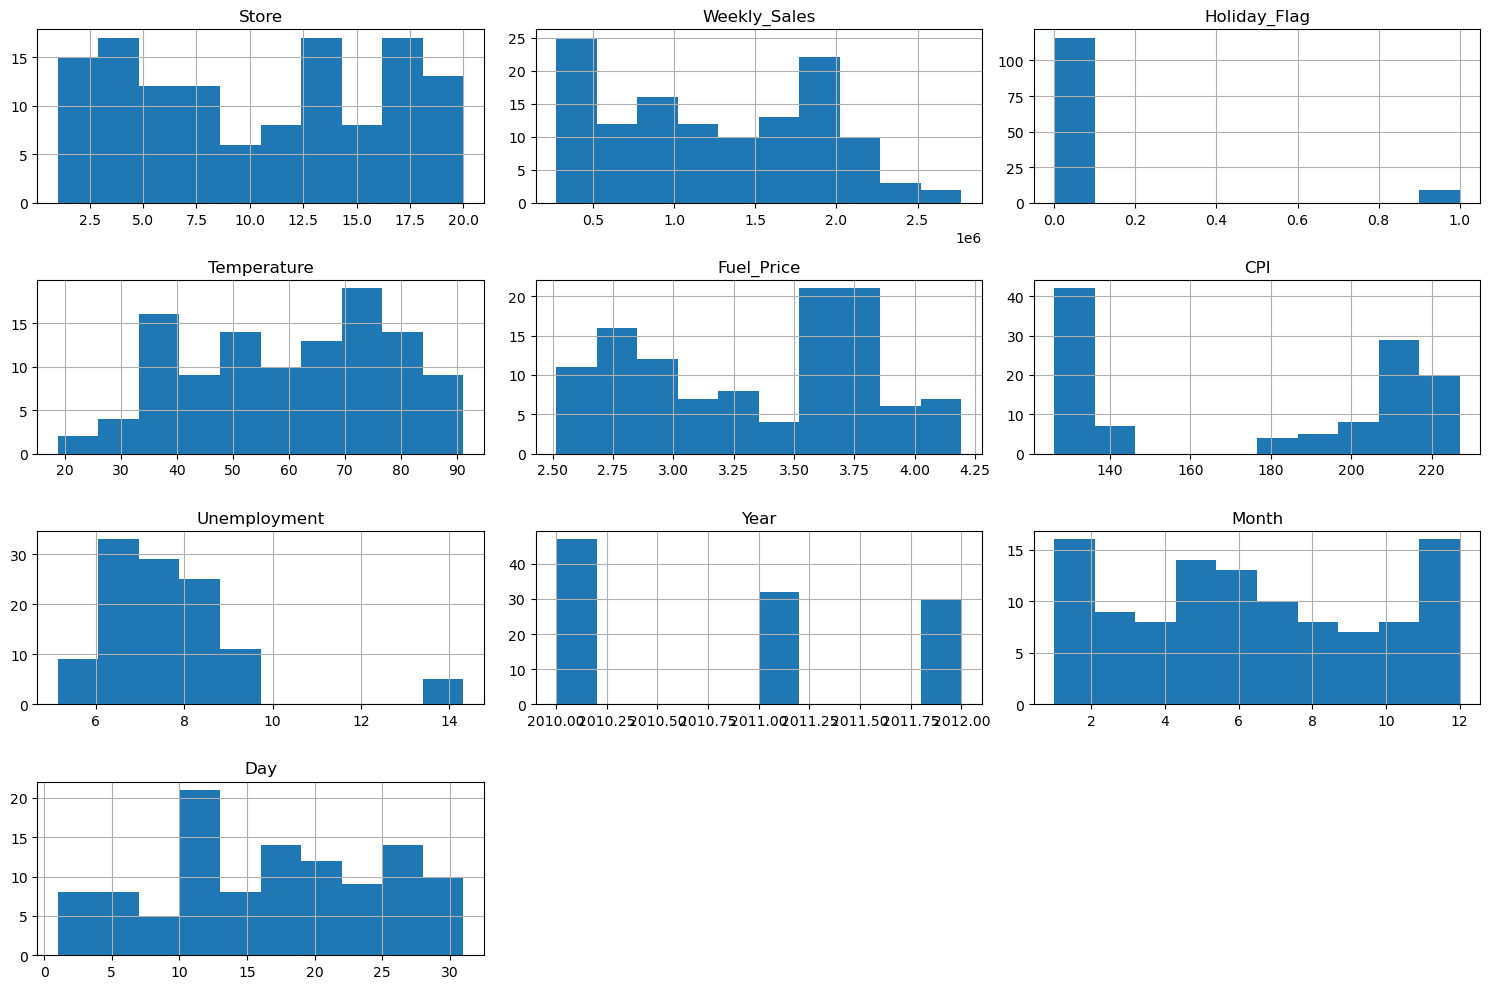


... Visualisation box plot ...


In [471]:
print(f"Nous avons {df.shape[0]} colonnes et {df.shape[1]} lignes dans ce jeu de données")

print("\n... Informations sur les colonnes et les types de données ...")
df.info() 

print("\n... Statistiques descriptives sur les colonnes numériques ...")
display(df.describe())

print("\n... Valeurs manquantes ...")
nb_valeurs_manquantes = df.isnull().sum()
pourcentage_valeurs_manquantes = (df.isnull().mean() * 100).round(2)
df_manquants = pd.DataFrame({
    'Nombre de Valeurs Manquantes': nb_valeurs_manquantes,
    '% Valeurs Manquantes': pourcentage_valeurs_manquantes
})
# Ne garder que les colonnes avec des valeurs manquantes
df_manquants[df_manquants['Nombre de Valeurs Manquantes'] > 0].sort_values('Nombre de Valeurs Manquantes', ascending=False)
print(df_manquants)

print("\n... Visualisation des valeurs manquantes ...")
fig = px.bar(df_manquants, 
             x=pourcentage_valeurs_manquantes.index, 
             y=pourcentage_valeurs_manquantes.values, 
             title="Valeurs manquantes par colonne",
             labels={'x': 'Colonnes', 'y': 'Valeurs manquantes en %'},
             text=pourcentage_valeurs_manquantes.values)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

print("\n... Visualisation histogramme ...")
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

print("\n... Visualisation box plot ...")
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns

# Créer une figure avec des sous-graphiques (1 colonne, autant de lignes que de colonnes numériques)
fig = make_subplots(rows=len(colonnes_numeriques), cols=1, subplot_titles=colonnes_numeriques)

# Ajouter un box plot pour chaque colonne numérique
for i, colonne in enumerate(colonnes_numeriques, start=1):
    box_plot = px.box(df, y=colonne, points="all").data[0]
    fig.add_trace(box_plot, row=i, col=1)

fig.update_layout(
    height=300 * len(colonnes_numeriques),
    width=800,
    title_text="Box Plots pour toutes les colonnes numériques",
    showlegend=False
)
fig.show()


### L'EDA Analyse exploratoire des données Approfondie
---

In [460]:
# Evolution des ventes par date selon le jeu de données
# Conversion en datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# groupement des ventes par dates
df_date=df.groupby("Date")["Weekly_Sales"].sum().reset_index().sort_values("Date")

fig = px.line(df_date, x='Date', y='Weekly_Sales', title='Evolution des ventes par date')
fig.update_xaxes(
    tickformat="%b %Y",  
    dtick="M1",           # un par mois sur l'axe des x
    tickangle=45
)
fig.show()
# Pic des ventes période des fêtes

C:\Users\natha\AppData\Local\Temp\ipykernel_23932\342321479.py:3: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [461]:

# Analyse Magasin
# Total des ventes par magasin 
total_par_magasin = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    total_par_magasin,
    x='Store',
    y='Weekly_Sales',
    title='Meilleures ventes totales par magasin'
)
fig.update_layout(
    xaxis=dict(
        type='category'  # Assure que l'axe X respecte l'ordre des données
    ))
fig.show()

# Moy des ventes totales par magasin
moy_par_magasin = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    moy_par_magasin,
    x='Store',  
    y='Weekly_Sales',
    title='Analyse des ventes moyennes par magasin',
    color='Store'
)
fig.update_layout(
    xaxis=dict(
        type='category'  # Assure que l'axe X respecte l'ordre des données
    )
)
fig.show()

# Analyse du jeu de données par magasin 
nb_semaines_par_magasin = df['Store'].value_counts().reset_index()
# Renommer les colonnes 
nb_semaines_par_magasin.columns = ['Store', 'Nombre de semaines']

fig=px.bar(
    nb_semaines_par_magasin,
    x='Store', 
    y='Nombre de semaines', 
    title='Nombre de semaines de Données disponibles par magasin'
    )
fig.update_layout(
    xaxis=dict(
        type='category'  # Assure que l'axe X respecte l'ordre des données
    ))
fig.show()
# Les données ne sont pas réparties de manière régulière sur la période, ce qui fausse l’analyse des volumes de ventes


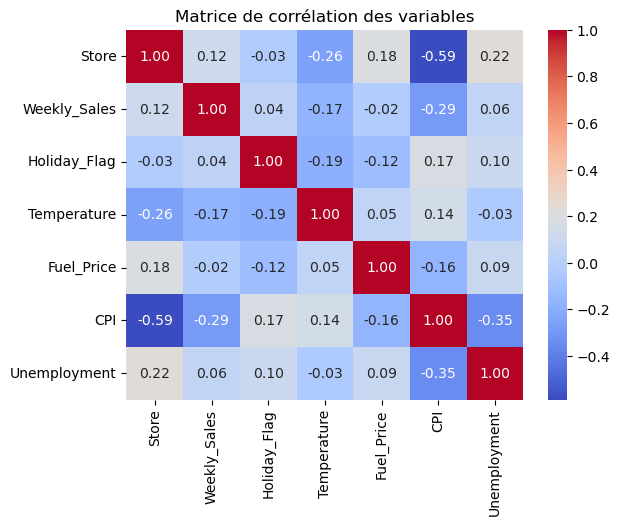

In [462]:
# Matrice de corrélation sur l'ensemble du jeu de données, pour voir les associations statistiques
# Sélection des colonnes numériques
df_num = df.select_dtypes(include='number')

corr_matrix = df_num.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation des variables")
plt.show()
# CPI, Temperature influs modérement sur notre target

### Prétraitement des données
---

In [463]:
# Traitement des valeurs manquantes pour la Target, Holidays_Flag (Boolean 0/1, vacances pas vacances)
# Les autres colonnes seront retraités lors de la création du modéle d'apprentissage
df= df.dropna(subset=['Weekly_Sales'])
df = df.dropna(subset=['Holiday_Flag']) 

print("... Afficher le nombre de valeurs manquantes ...") 
missing = df.isnull().sum()
print(missing)


... Afficher le nombre de valeurs manquantes ...
Store            0
Date            16
Weekly_Sales     0
Holiday_Flag     0
Temperature     15
Fuel_Price      12
CPI             10
Unemployment    13
dtype: int64


In [464]:
# Valeurs aberrantes pour 'Unemployment','CPI','Fuel_Price','Temperature'
cols = ['Unemployment','CPI','Fuel_Price','Temperature']

for col in cols:
    mean = df[col].mean()
    std = df[col].std()
    palier_haut = mean + 3 * std # seuil outlier + ou - 3 sigma
    palier_bas = mean - 3 * std

    outlier_condition = (df[col] > palier_haut) | (df[col] < palier_bas) # identification des lignes à + ou - 3 sigma

df = df[~ outlier_condition]  # suppression des outliers identifiés
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         125 non-null    float64       
 1   Date          109 non-null    datetime64[ns]
 2   Weekly_Sales  125 non-null    float64       
 3   Holiday_Flag  125 non-null    float64       
 4   Temperature   110 non-null    float64       
 5   Fuel_Price    113 non-null    float64       
 6   CPI           115 non-null    float64       
 7   Unemployment  112 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 8.8 KB


.... Visualisation histogramme ...


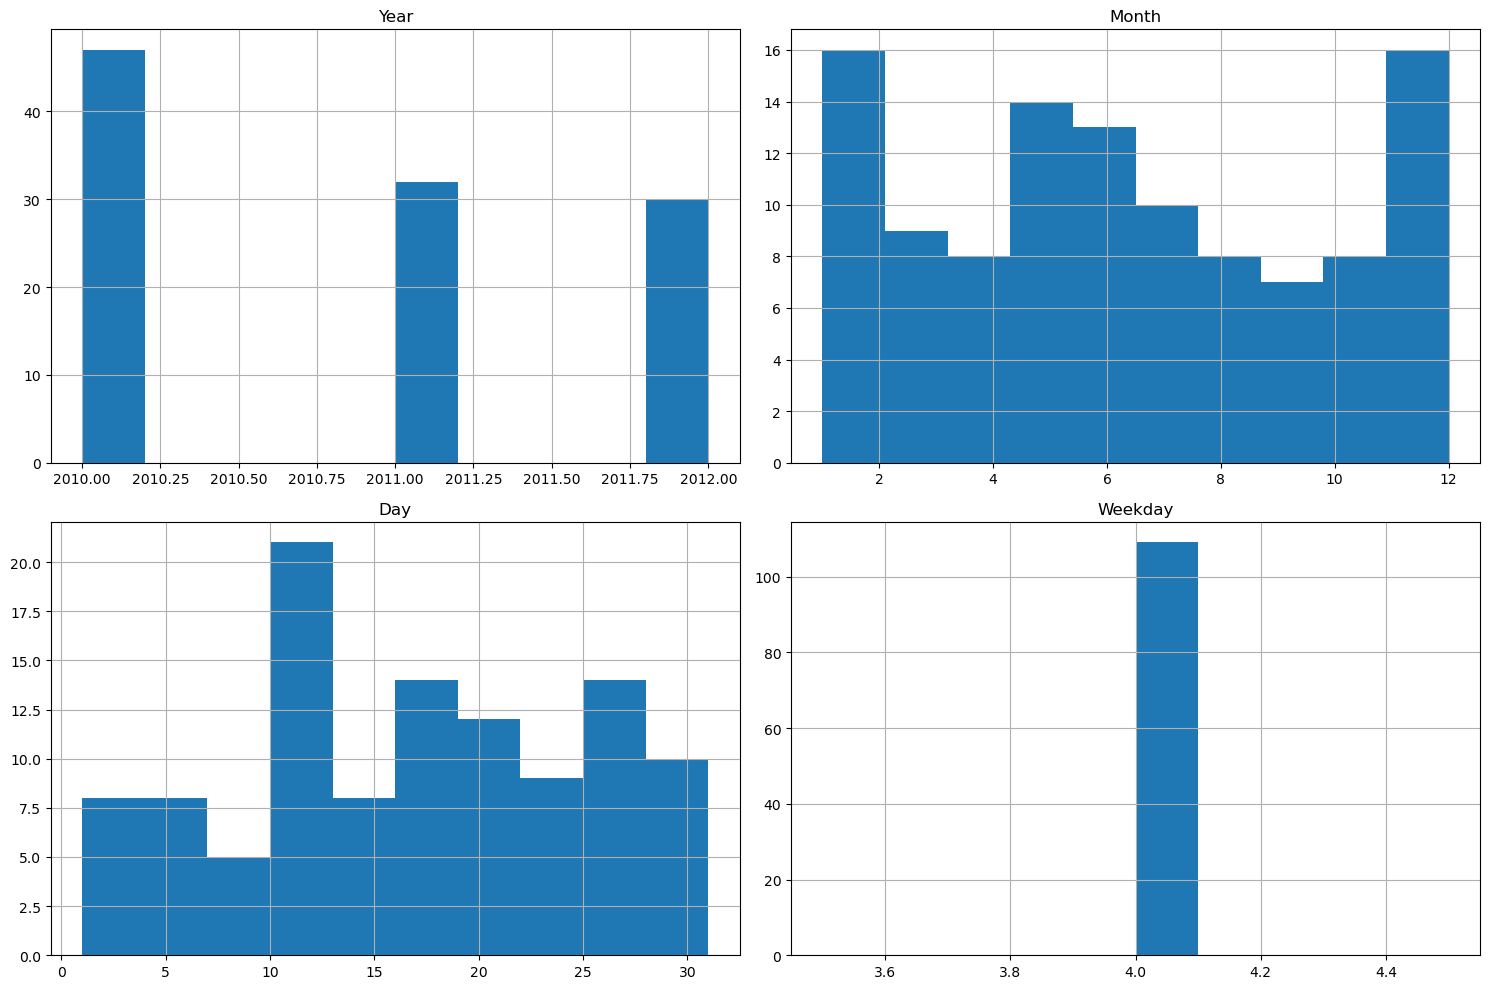

In [465]:
# Analyse de la colonne Date
# Création colonne Year, Month, Day, Weekday 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

print(".... Visualisation histogramme ...")
df[['Year','Month','Day','Weekday']].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

# suppression de la colonne Weekday qui n'a qu'un jour unique et col 'Date'
df=df.drop(['Weekday','Date'], axis=1)

In [466]:
# Analyse jeu de données
# Ventes par année
df_year=df.sort_values(by='Year')
fig = px.bar(df_year, x = 'Year', y = 'Weekly_Sales', title='Répartition des Ventes par Année')
fig.show()

# Analyse du jeu de données par année 
nb_semaines_par_année = df['Year'].value_counts().reset_index() 
# Renommer les colonnes 
nb_semaines_par_année.columns = ['Year', 'Nombre de semaines'] 

fig=px.bar(
    nb_semaines_par_année, 
    x='Year', 
    y='Nombre de semaines', 
    title='Nombre de semaines de données disponibles par année', 
    text='Nombre de semaines',
    color='Year' 
    ) 
fig.show()
# Le graphique 1 montre une évolution du CA par année, mais cette lecture est faussée par le graphique 2 : 
# les années 2011 et 2012 ont moins de semaines de données. Le CA total est donc sous-estimé et ne reflète pas 
# la performance réelle des magasins, mais la quantité de données disponibles.

In [467]:
# Calculer la moy des ventes totales par magasin par année
moy_par_magasin_par_année = df.groupby(['Store','Year'])['Weekly_Sales'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    moy_par_magasin_par_année,
    x='Store',  
    y='Weekly_Sales',
    facet_row='Year',
    title='Analyse des ventes moyennes par magasin par année',
    color='Year',
)
# fig.update_layout(height=300*nb_semaines_par_magasin_annee['Year'].nunique())
fig.update_layout(
    height=300*moy_par_magasin_par_année['Year'].nunique(),
    xaxis=dict(
        type='category'  # Assure que l'axe X respecte l'ordre des données
    ))
# Mettre à jour les axes X pour chaque sous-graphique
fig.update_xaxes(matches=None, showticklabels=True)
fig.show()

In [ ]:
# Analyse du jeu de données par magasin et par année
nb_semaines_par_magasin_annee = (
    df.groupby(['Store', 'Year'])['Weekly_Sales'].value_counts().reset_index(name='Nombre_de_semaines')
)

fig = px.bar(
    nb_semaines_par_magasin_annee,
    x='Store',
    y='Nombre_de_semaines',
    facet_row='Year',
    color='Year',
    title='Nombre de semaines de données disponibles par magasin et par année'
)
fig.update_layout(
    height=300*moy_par_magasin_par_année['Year'].nunique(),
    xaxis=dict(
        type='category'  # Assure que l'axe X respecte l'ordre des données
    ))
# Mettre à jour les axes X pour chaque sous-graphique
fig.update_xaxes(matches=None, showticklabels=True)
fig.show()
# on remarque que sur l'année 2012, nous avons beaucoup de Store qui ne donne pas leur CA

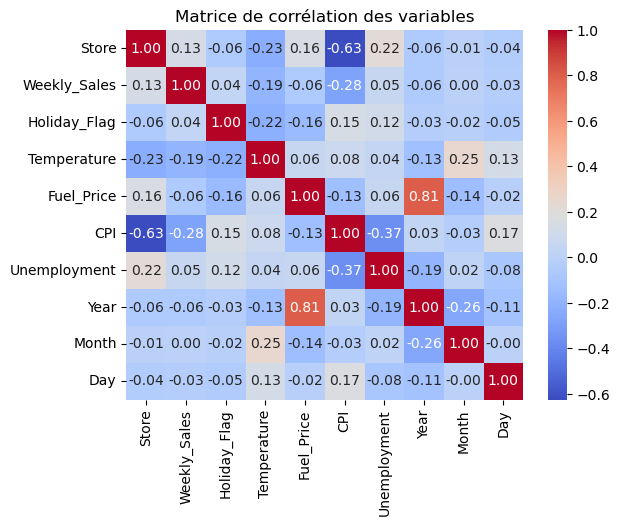

In [469]:
# Matrice de corrélation sur l'ensemble du jeu de données, pour voir les associations statistiques
# Sélection des colonnes numériques
df_num = df.select_dtypes(include='number')

corr_matrix = df_num.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation des variables")
plt.show()


In [470]:
# Sauvegarde du fichier 
df.to_csv("data/walmart_clean.csv", index=False)